In [55]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plot_params = {}
sim_params = {}

plot_params['s']        = 0.2
plot_params['lim1']     = -80
plot_params['lim2']     = 80
plot_params['wnum']     = 1000
plot_params['time_val'] = 0

sim_params['k'] = 43 # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)

g_sweep = np.linspace(30, 100, plot_params['wnum'])

casc_t = np.zeros((len(y1_1), len(g_value)), dtype=complex)
for g_value in g_sweep:
    # Cavity 1
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = g_value                       # rabi frequency
    sim_params['gamma'] = sim_params['k']/100           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 10                            # number of emmiters    
    sim_params['jvec']  = np.zeros(int((10-1)*10/2))    # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,10))

    pt1 = PhotonTransmission(plot_params, sim_params)
    x_1, y1_1, y2_1 = pt1.calc_first_subspace()

    # Cavity 2
    sim_params['k1']    = sim_params['k']/2
    sim_params['k2']    = sim_params['k']/2
    sim_params['gnd']   = 1
    sim_params['g']     = g_value                       # rabi frequency
    sim_params['gamma'] = sim_params['k']/100           # emitter linewidth
    sim_params['Gc']    = 0                             # additional loss channel
    sim_params['we']    = 0                             # emmiter detuning
    sim_params['wc']    = 0                             # cavity detuning
    sim_params['N']     = 10                            # number of emmiters    
    sim_params['jvec']  = np.zeros(int((10-1)*10/2))    # dipole-dipole coupling 
    sim_params['We']    = sim_params['we']*np.ones((1,10))

    pt2 = PhotonTransmission(plot_params, sim_params)
    x_2, y1_2, y2_2 = pt2.calc_first_subspace()

    # Combined 
    for j in range(len(y1_1)):
        S1 = np.array([[y1_1[j], np.conj(y2_1[j])], [y2_1[j], np.conj(y1_1[j])]])
        S2 = np.array([[y1_2[j], np.conj(y2_2[j])], [y2_2[j], np.conj(y1_2[j])]])
        
        inter1 = S1@np.array([[1],[0]])
        out = S2@inter1
        
        casc_t[g_val_num][j] = out[0]
    
    g_val_num += 1




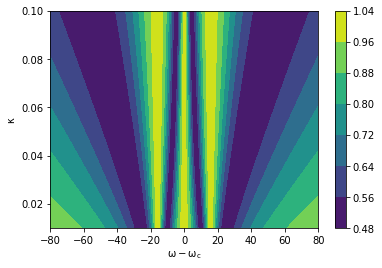

In [57]:
g_value = np.linspace(0.01, 0.1, num)
X, G_value = np.meshgrid(x_1, g_value)

plt.rcParams.update({'mathtext.default':  'regular' })
plt.contourf(X, G_value, casc_t)
plt.colorbar()
# ax.set_xlabel('Z')
plt.ylabel('$\gamma$')
plt.xlabel('$\omega-\omega_{c}$')
plt.show()

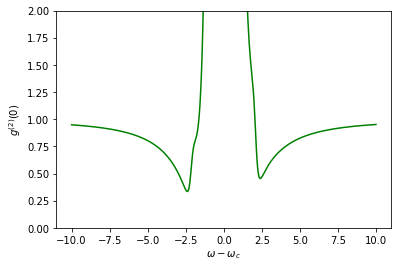

In [8]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -10
plot_params['lim2'] = 10
plot_params['wnum'] = 500
plot_params['time_val'] = 0

sim_params['k']  = 1    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 1  # rabi frequency
sim_params['g']  = 0.01 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['J']  = 0     # dipole-dipole coupling  

# fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))

n_list = [5]
for i in range(len(n_list)):
    sim_params['N']  = n_list[i]
    sim_params['jvec'] = np.zeros(int((n_list[i]-1)*n_list[i]/2))
    sim_params['We'] = sim_params['we']*np.ones((1,n_list[i]))
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2, y3, y4 = pt1.calc_second_subspace()
    # axs[i].plot(x, y1, 'b')
    # axs[i].plot(x, y2, 'r')
    plt.plot(x, y3, 'g')
    plt.ylim(top=2)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=0)  
    # axs[i].plot(x, y4, 'k')
    # plt.set_ylim([0,3])
    plt.ylabel('$g^{(2)}(0)$')
    plt.xlabel('$\omega-\omega_{c}$')

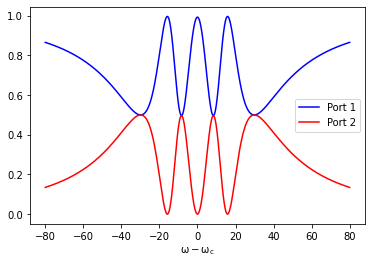

In [14]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 5 # rabi frequency
sim_params['g']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['we'] = 0   # cavity detuning
sim_params['wc'] = 0
sim_params['J']  = 0     # dipole-dipole coupling  
sim_params['N']  = 10
sim_params['jvec'] = np.zeros(int((10-1)*10/2))
sim_params['We'] = sim_params['we']*np.ones((1,10))


# fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))

# n_list = [1, 10, 100]
# wc_list = [0, 5, 10]
# for i in range(len(wc_list)):
pt1 = PhotonTransmission(plot_params, sim_params)
x_1, y1_1, y2_1 = pt1.calc_first_subspace()
# print(y1)
# print(y2)

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 5 # rabi frequency
sim_params['g']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['we'] = 0    # cavity detuning
sim_params['wc'] = 0
sim_params['J']  = 0     # dipole-dipole coupling  
sim_params['N']  = 1
sim_params['jvec'] = np.zeros(int((sim_params['N']-1)*sim_params['N']/2))
sim_params['We'] = sim_params['we']*np.ones((1,sim_params['N']))

pt2 = PhotonTransmission(plot_params, sim_params)
x_2, y1_2, y2_2 = pt2.calc_first_subspace()

casc_t = np.zeros(len(y1_1), dtype=complex)
casc_r = np.zeros(len(y1_1), dtype=complex)
for j in range(len(y1_1)):
    S1 = np.array([[y1_1[j], np.conj(y2_1[j])], [y2_1[j], np.conj(y1_1[j])]])
    S2 = np.array([[y1_2[j], np.conj(y2_2[j])], [y2_2[j], np.conj(y1_2[j])]])
    # print(S)
    inter1 = S1@np.array([[1],[0]])
    out = S2@inter1
    casc_t[j] = out[0]
    casc_r[j] = out[1]

plt.rcParams.update({'mathtext.default':  'regular' })
plt.plot(x_1, casc_t, 'b', label='Port 1')
plt.plot(x_2, casc_r, 'r', label='Port 2')
plt.xlabel('$\omega-\omega_{c}$')
plt.legend()
# axs[i].plot(x, y1, 'b')
# axs[i].plot(x, y2, 'r')
# axs[i].set_ylim([0,2])

In [11]:
import numpy as np
import openpyxl
import torch
from calcD import calc_D
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt

u = 1.96*3.33e-30;  #2 Debye into SI units
lmbda = 2.9e-6;    #2.9 um wavelength
c = 3e8;            #speed of light
w = 2*np.pi*c/lmbda;  #get angular frequency
hb = 1.054e-34;     #hbar
eo = 8.854e-12;     #permittivity of free space
er = 11.7;          #relative permittivity of silicon
refractive_index = np.sqrt(er);       #get refractive index of Si

g = 0.1
x = np.random.normal(0, 10e-9, 200)
y = np.random.normal(0, 10e-9, 200)
z = np.random.normal(0, 10e-9, 200)
We = np.random.normal(0, g*117, 200)

d, costheta, lw_overlap = calc_D(x, y, z, We, g)

# print(d)
# print(costheta)
# print(np.sort(lw_overlap))

val1 = u**2/(4*np.pi*eo)
val2 = (1-3*np.power(costheta,2))*6.2e18*1e6
J1 = 0*np.divide(val1, np.power(d,3))*val2
J2 = lw_overlap*np.divide(val1, np.power(d,3))*val2
J3 = np.divide(val1, np.power(d,3))*val2

J = np.array(([np.transpose(J1), np.transpose(J2)]))
# print(J)
# print(J[1,:])

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -70
plot_params['lim2'] = 70
plot_params['wnum'] = 2000
plot_params['time_val'] = 0

sim_params['k']  = 50    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 1 # rabi frequency
sim_params['g']  = g # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 1     # emitter detuning
sim_params['We'] = np.random.normal(0, g*117, 200)

fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 15))

n_list = [1,10,100,200]
for i in range(len(n_list)):
    for j in range(0,2):
        sim_params['N']  = n_list[i]
        sim_params['jvec'] = J[j,0:int((n_list[i]-1)*n_list[i]/2)]
        pt1 = PhotonTransmission(plot_params, sim_params)
        x, y1, y2 = pt1.calc_first_subspace()
        axs[i][j].plot(np.transpose(x), y1*torch.conj(y1), 'b')
        # axs[i].plot(x, y2, 'r')

tensor([[0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j]])


0
0
45
45
4950
4950
19900
19900


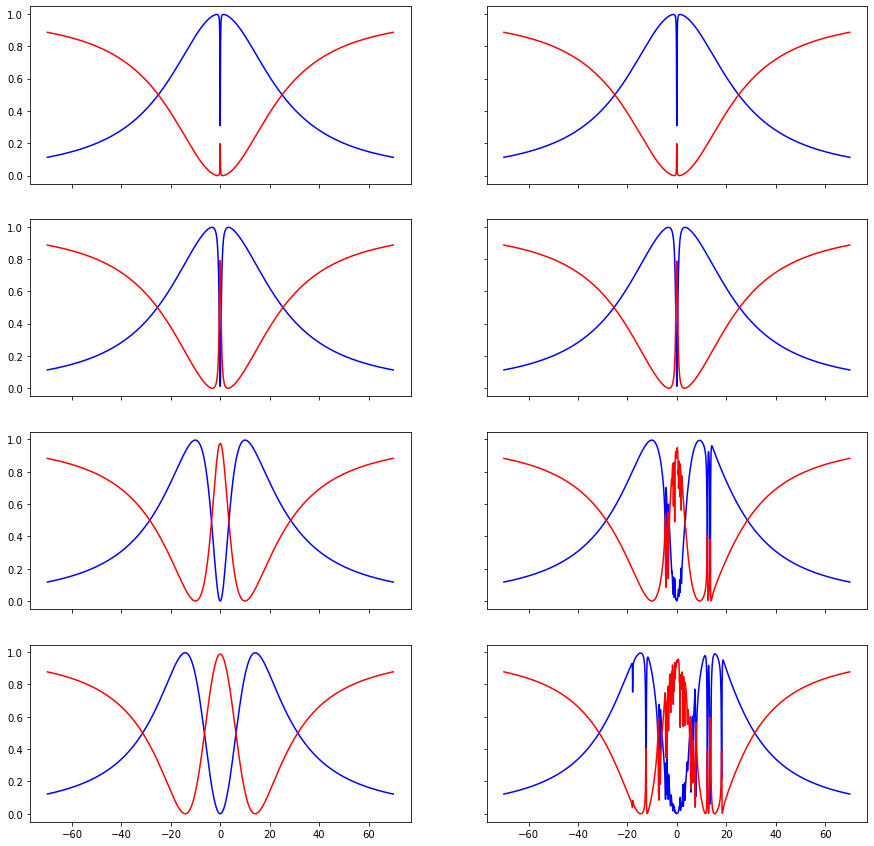

In [14]:
import numpy as np
import torch
from calcD import calc_D
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt

u = 1.96*3.33e-30;  #2 Debye into SI units
lmbda = 2.9e-6;    #2.9 um wavelength
c = 3e8;            #speed of light
w = 2*np.pi*c/lmbda;  #get angular frequency
hb = 1.054e-34;     #hbar
eo = 8.854e-12;     #permittivity of free space
er = 11.7;          #relative permittivity of silicon
refractive_index = np.sqrt(er);       #get refractive index of Si

g = 0.1
x = np.random.normal(0, 10e-9, 200)
y = np.random.normal(0, 10e-9, 200)
z = np.random.normal(0, 10e-9, 200)
We = np.random.normal(0, g*117, 200)

d, costheta, lw_overlap = calc_D(x, y, z, We, g)

# print(d)
# print(costheta)
# print(np.sort(lw_overlap))

val1 = u**2/(4*np.pi*eo)
val2 = (1-3*np.power(costheta,2))*6.2e18*1e6
J1 = 0*np.divide(val1, np.power(d,3))*val2
J2 = lw_overlap*np.divide(val1, np.power(d,3))*val2
J3 = np.divide(val1, np.power(d,3))*val2

J = np.array(([np.transpose(J1), np.transpose(J2)]))
# print(J)
# print(J[1,:])

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -70
plot_params['lim2'] = 70
plot_params['wnum'] = 2000
plot_params['time_val'] = 0

sim_params['k']  = 50    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 1 # rabi frequency
sim_params['g']  = g # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['We'] = np.random.normal(0, 0, 200)

fig, axs = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(15, 15))

n_list = [1,10,100,200]
for i in range(len(n_list)):
    for j in range(0,2):
        sim_params['N']  = n_list[i]
        # print(int((n_list[i]-1)*n_list[i]/2))
        sim_params['jvec'] = J[j,0:int((n_list[i]-1)*n_list[i]/2)]
        pt1 = PhotonTransmission(plot_params, sim_params)
        x, y1, y2 = pt1.calc_first_subspace()
        axs[i][j].plot(np.transpose(x), y1, 'b')
        axs[i][j].plot(x, y2, 'r')


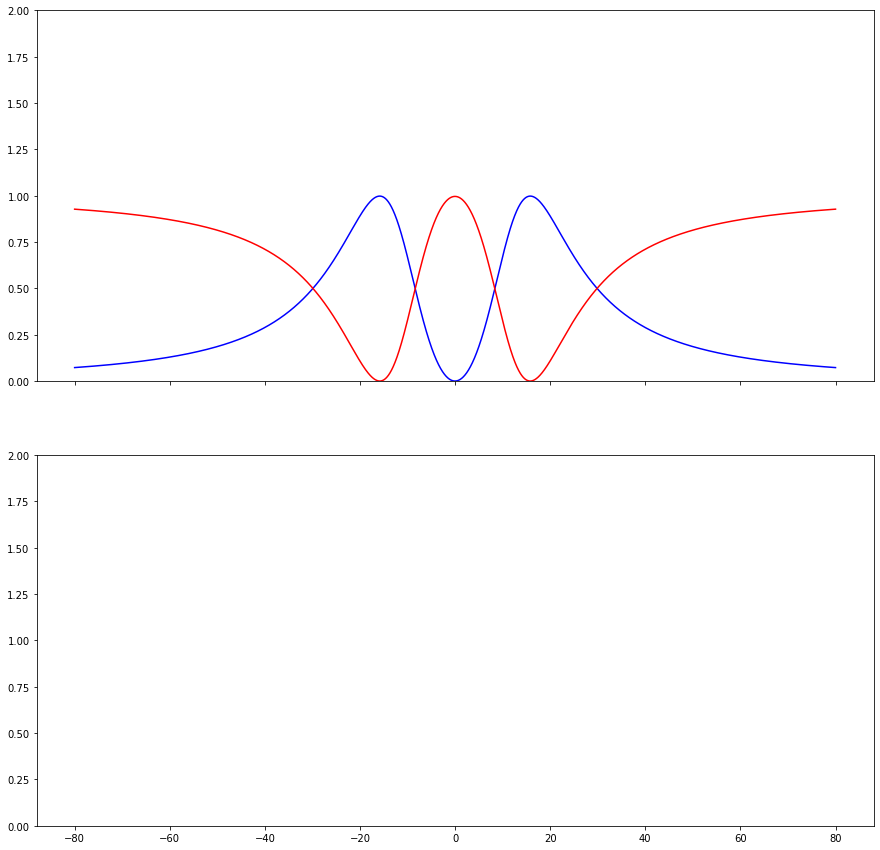

In [37]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 5  # rabi frequency
sim_params['g']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['J']  = 0     # dipole-dipole coupling  


fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize=(15, 15))

n_list = [10]
for i in range(len(n_list)):
    sim_params['N']  = n_list[i]
    sim_params['jvec'] = np.zeros(int((n_list[i]-1)*n_list[i]/2))
    sim_params['We'] = sim_params['we']*np.ones((1,n_list[i]))
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2 = pt1.calc_first_subspace()
    axs[i].plot(x, y1, 'b')
    axs[i].plot(x, y2, 'r')
    axs[i].set_ylim([0,2])

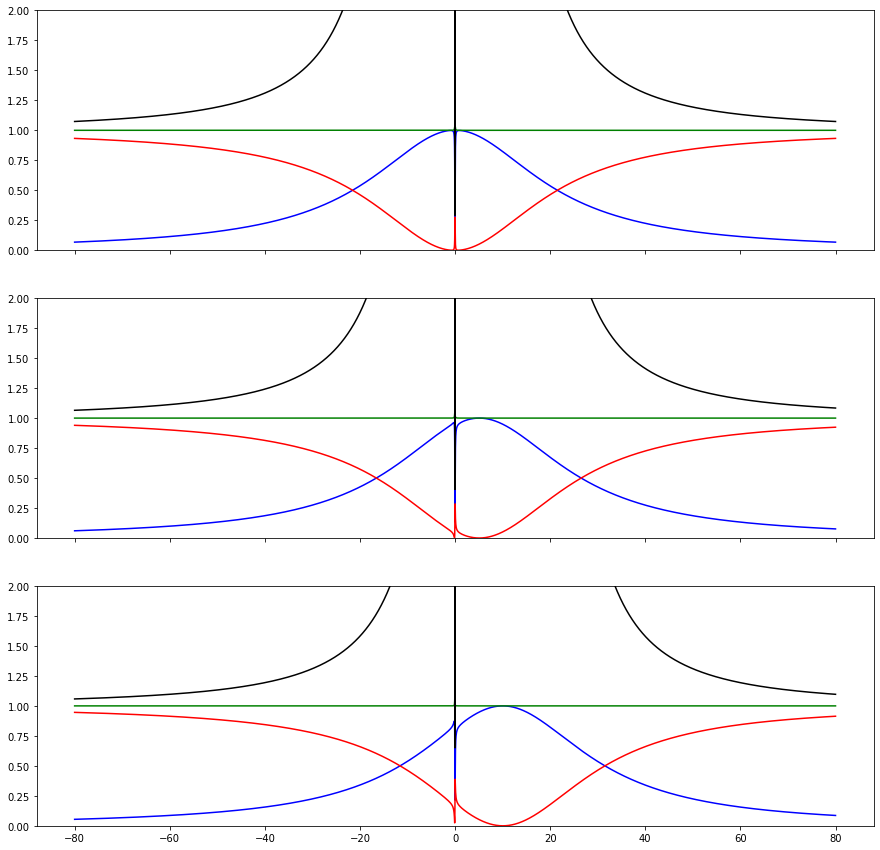

In [5]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 0.32  # rabi frequency
sim_params['g']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['we'] = 0     # emitter detuning
sim_params['J']  = 0     # dipole-dipole coupling  
sim_params['N']  = 5

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))

wc_list = [0, 5, 10]
for i in range(len(wc_list)):
    sim_params['wc']  = wc_list[i]
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2, y3, y4 = pt1.calc_second_subspace()
    axs[i].plot(x, y1, 'b')
    axs[i].plot(x, y2, 'r')
    axs[i].plot(x, y3, 'g')
    axs[i].plot(x, y4, 'k')
    axs[i].set_ylim([0,2])

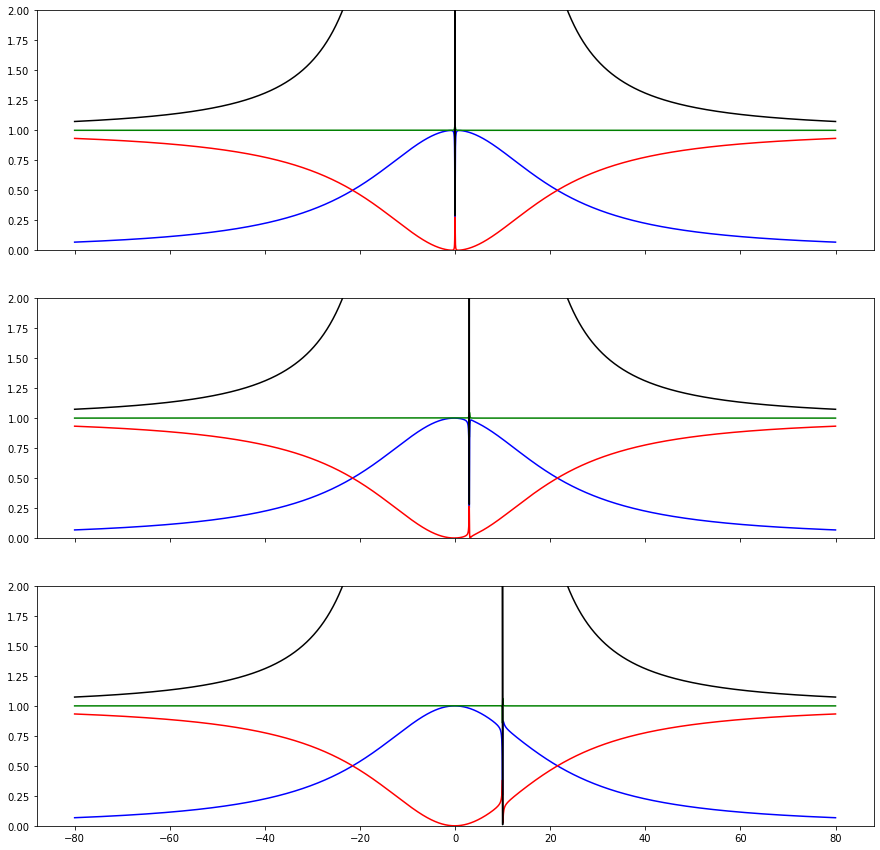

In [3]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['N'] = 5
sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 0.32  # rabi frequency
sim_params['g']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['J']  = 0     # dipole-dipole coupling  

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))

we_list = [0, 3, 10]
for i in range(len(we_list)):
    sim_params['we'] = we_list[i]     # emitter detuning
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2, y3, y4 = pt1.calc_second_subspace()
    axs[i].plot(x, y1, 'b')
    axs[i].plot(x, y2, 'r')
    axs[i].plot(x, y3, 'g')
    axs[i].plot(x, y4, 'k')
    axs[i].set_ylim([0,2])

8.278364658355713


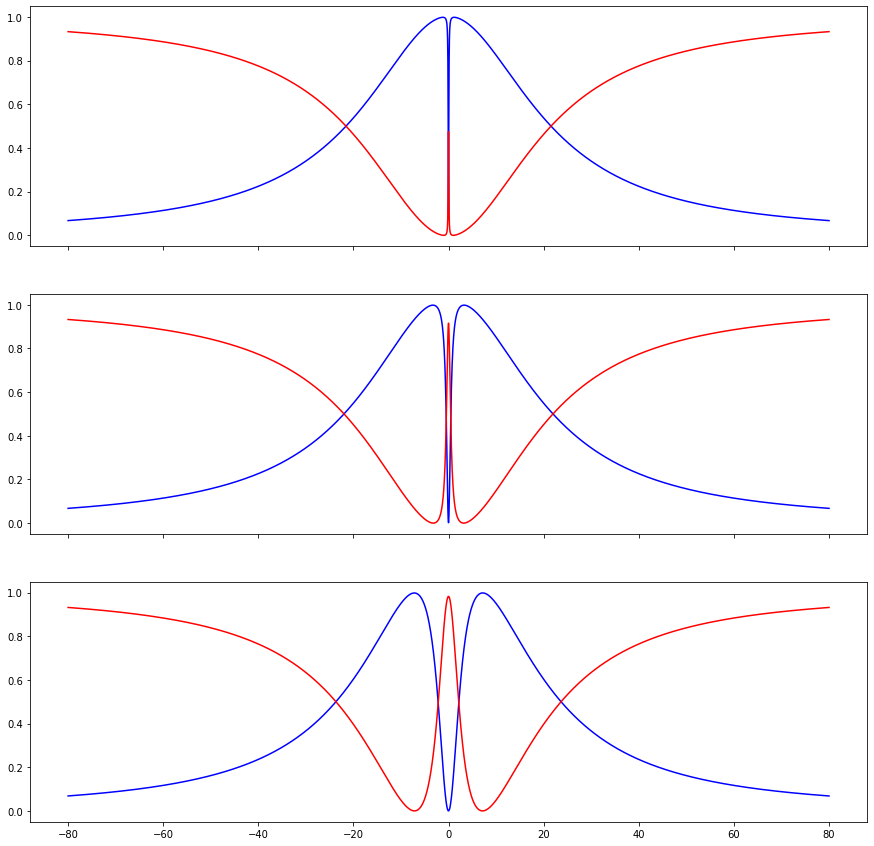

In [14]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np
import time

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 0.32  # rabi frequency
sim_params['g']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0     # cavity detuning
sim_params['we'] = 0     # emitter detuning
sim_params['J']  = 0     # dipole-dipole coupling  

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))

current_time = time.time()

n_list = [10, 100, 500]
for i in range(len(n_list)):
    sim_params['N']  = n_list[i]
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2 = pt1.calc_first_subspace()
    axs[i].plot(np.transpose(x), y1, 'b')
    axs[i].plot(x, y2, 'r')

finish_time = time.time()
print(finish_time-current_time)



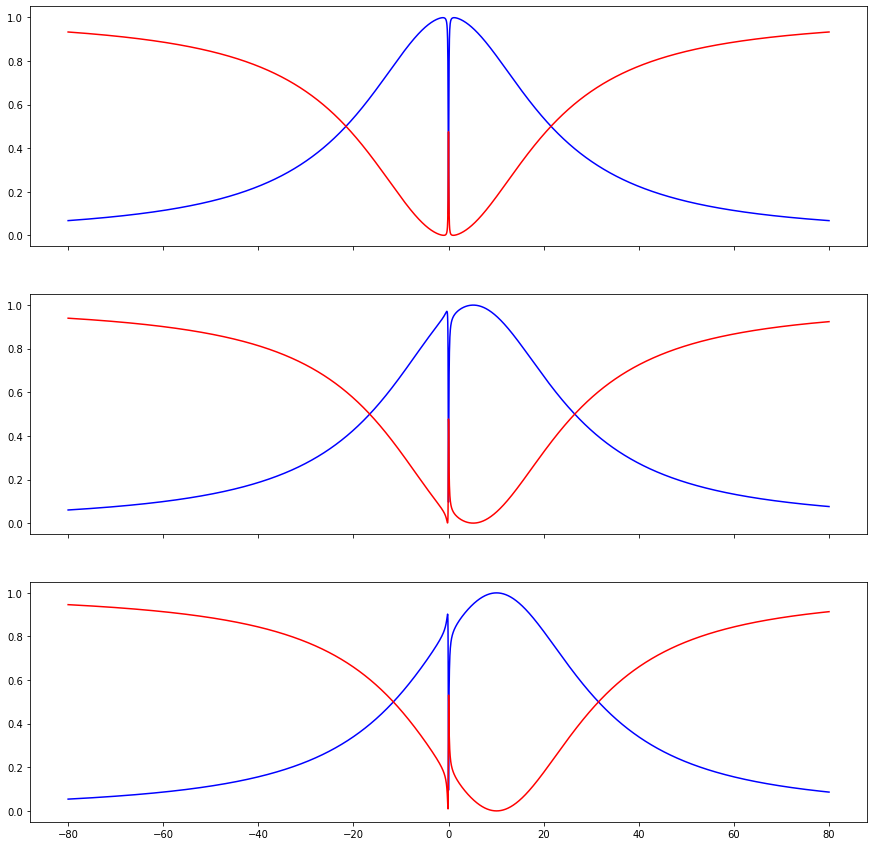

In [9]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 0.32  # rabi frequency
sim_params['g']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['we'] = 0     # emitter detuning
sim_params['J']  = 0     # dipole-dipole coupling  
sim_params['N']  = 10

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))

wc_list = [0, 5, 10]
for i in range(len(n_list)):
    sim_params['wc']  = wc_list[i]
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2 = pt1.calc_first_subspace()
    axs[i].plot(np.transpose(x), y1, 'b')
    axs[i].plot(x, y2, 'r')

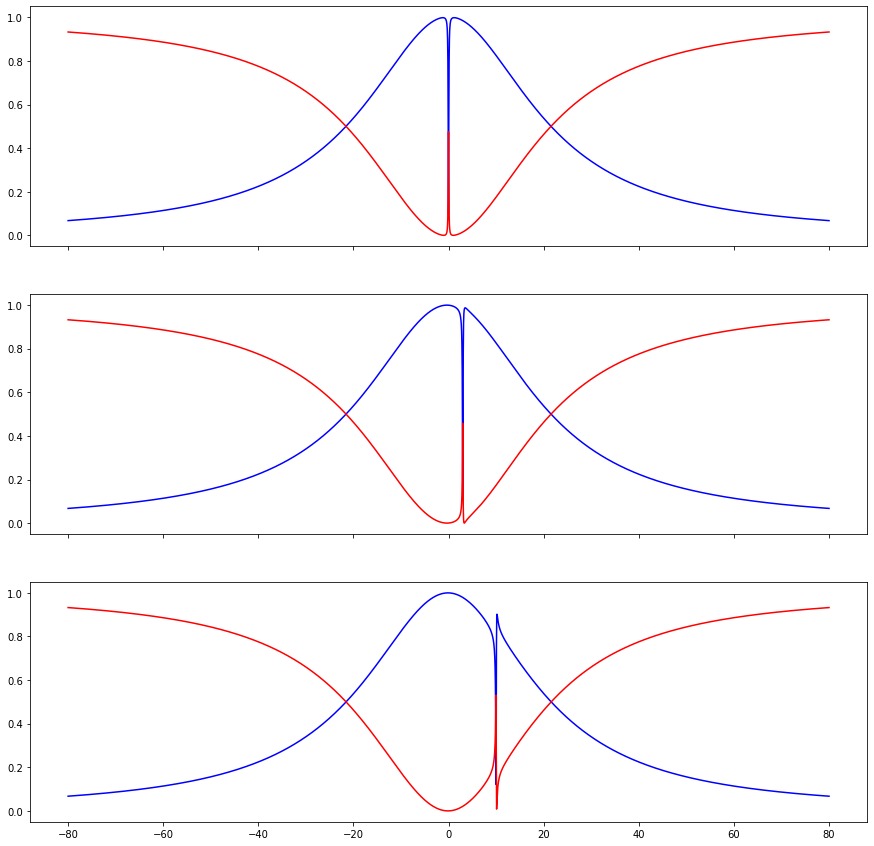

In [10]:
from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt
import numpy as np

plot_params = {}
sim_params = {}

plot_params['s'] = 0.2
plot_params['lim1'] = -80
plot_params['lim2'] = 80
plot_params['wnum'] = 5000
plot_params['time_val'] = 0

sim_params['k']  = 43    # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000)
sim_params['k1'] = sim_params['k']/2
sim_params['k2'] = sim_params['k']/2
sim_params['gnd'] = 1
sim_params['go'] = 0.32  # rabi frequency
sim_params['g']  = 0.043 # emitter linewidth
sim_params['Gc'] = 0     # additional loss channel
sim_params['wc'] = 0

sim_params['J']  = 0     # dipole-dipole coupling  
sim_params['N']  = 10

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15))

we_list = [0, 3, 10]
for i in range(len(we_list)):
    sim_params['we'] = we_list[i]     # emitter detuning
    pt1 = PhotonTransmission(plot_params, sim_params)
    x, y1, y2 = pt1.calc_first_subspace()
    axs[i].plot(np.transpose(x), y1, 'b')
    axs[i].plot(x, y2, 'r')

In [6]:
import numpy as np
import jax
from math import comb
import numpy.matlib as mat
import scipy.linalg as la
from scipy.sparse import diags
import os
import time 
from genJ import genJ
import torch
from itertools import combinations
from genGO_vec import genGO
def PhotonTransmission(num):
    os.environ["TF_CPP_MIN_LOG_LEVEL"] = "0"
    Hefft = 0

    g3fig = 0
    g3time = 0

    mu = 0
    sigma = 0

    tnum = 2
    t_end = 20

    #plotting parameters
    time_val = 0
    s = 0.2
    lim1 = -80
    lim2 = 80
    wnum = 5000

    minval = 6.66
    # time = 0

    n = [num]

    k = 43      # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000) 
    k1 = k/2
    k2 = k/2
    go = 0.32  #rabi frequency
    g = 0.043   # emitter linewidth
    Gc = 0      # additional loss channel
    wc = 0      # cavity detuning
    we = 0      # emitter detuning
    J = 0       # dipole-dipole coupling
    w = np.linspace(lim1, lim2, num=wnum)

    for N in n:
        jvec = J*torch.ones(int(N*(N-1)/2))

        Go = go*torch.ones(N)
        G = g*torch.ones(N)
        K = k*torch.ones(N)
        We = we*torch.ones(N)
        

        # values used to dimension the higher excitation hamiltonians
        nck0 = comb(N, 0)
        nck1 = comb(N, 1)

        try:
            nck2 = comb(N,2)
        except:
            nck2 = 0

        try:
            nck3 = comb(N,3)
        except:
            nck3 = 0

        # creation/annihilation operators
        gnd = 1
        a1 = torch.cat((torch.tensor([1]),torch.zeros(N, dtype=torch.cfloat)))
        Heff1=torch.zeros(N+1,N+1, dtype=torch.cfloat)

        Heff1[0,0]= wc - 1j*k/2

        if N > 0:

            Heff1[0,1:N+1] = Go
            Heff1[1:N+1,0] = Go
            Heff1[1:N+1,1:N+1] += (np.diag(We)-1j*np.diag(G)/2)

        J=genJ(jvec)
        Heff1[1:nck0+nck1+1,1:nck0+nck1+1] += J
        lambda1, phi1 = la.eig(Heff1)
        lambda1 = torch.from_numpy(lambda1)
        phi1 = torch.from_numpy(phi1)
        phi1v = la.inv(phi1)
        phi1v = torch.from_numpy(phi1v)
        
        a2 = torch.hstack((torch.eye(N+1, dtype=torch.cfloat), torch.zeros((N+1, 1)).repeat(1,nck2)))
        a2[1] = a2[1]*np.sqrt(2)

        # # a3 = np.zeros((nck0+nck1+nck2,nck0+nck1+nck2+nck3))
        # # a3[0,0] = np.sqrt(3)
        # # a3[1:(nck1+nck0),1:(nck1+nck0)] = np.eye(nck1)*(np.sqrt(2))
        # # a3[nck0+nck1:nck0+nck1+nck2,nck0+nck1:nck0+nck1+nck2] = np.eye(nck2)

        # ## Zeroth excitation subspace
        # Heff0=0

        # ## First Excitation Subspace
        # Heff1=torch.zeros(N+1,N+1, dtype=torch.cfloat)
        # # cavity loss
        # Heff1[0,0]= wc - 1j*k/2 #+1iw comes from the diagonal contribution later
        # # jax.ops.index_update(Heff1, jax.ops.index[0,0], wc - 1j*k/2)
        M = int(1+N*(N+1)/2)
        Heff2=torch.zeros(M,M, dtype=torch.cfloat)
        Heff2[0,0]= 2*(wc - 1j*k/2)
        Heff2[0,1:N+1] = Go*np.sqrt(2)
        Heff2[1:N+1,0] = Go*np.sqrt(2)

        if N > 0:
            # spontaneous emission
            Heff2[1:N+1,1:N+1] = (wc-1j*k/2+(we-1j*g/2))*torch.eye(N)
            comb_vec = torch.tensor([[a[0] + a[1]] for a in combinations((we-1j*g/2)*torch.ones((N,1)),2)])
            Heff2[N+1:,N+1:] = torch.eye(comb_vec.size(0), dtype=torch.cfloat)*comb_vec
            # jax.ops.index_add(Heff1, jax.ops.index[1:N+2,1:N+2], (np.diag(We)-1j*np.diag(G)/2))

        J=genJ(jvec)
        Heff2[nck0:nck0+nck1,nck0:nck0+nck1] += J
        J2 = torch.zeros(comb(N,2),comb(N,2))
        Heff2[nck0+nck1:nck0+nck1+nck2,nck0+nck1:nck0+nck1+nck2] += J2

        GO=genGO(Go)
        r,c=GO.shape
        Heff2[N+1:N+2+r-1,1:2+c-1] += GO
        Heff2[1:2+c-1,N+1:N+2+r-1] += np.transpose(GO)

        lambda2, phi2 = la.eig(Heff2)
        lambda2 = torch.from_numpy(lambda2)
        phi2 = torch.from_numpy(phi2)
        # # print(phi1)
        phi2v = la.inv(phi2)
        phi2v = torch.from_numpy(phi2v)
        # # norm=la.norm(phi1, axis=0)
        # # print(norm)

        w_inc = (lim2-lim1)/wnum
        t_inc = t_end/tnum
        t = torch.zeros(wnum, dtype=torch.cfloat)
        fw2 = torch.zeros(wnum, dtype=torch.cfloat)
        for i in range(0,wnum):
            w_val = lim1+(i+1)*w_inc
            D1 = ((lambda1-w_val)**-1)*torch.eye(N+1)
            D2 = ((lambda2-2*w_val)**-1)*torch.eye(M)
            # print(D1)
            # Transmission
            # current_time = time.time()

            inter3 = torch.matmul(a1,phi1)
            # time3 = time.time()
            # print("time3:", time3-current_time)

            inter2 = torch.matmul(inter3,D1)
            # time2 = time.time()
            # print("time2:", time2-time3)

            inter1 = torch.matmul(inter2,phi1v)
            # time1 = time.time()
            # print("time1:", time1-time2)

            inter0 = torch.matmul(inter1,np.transpose(a1))
            # time0 = time.time()
            # print("time0:", time0-time1)
            t[i] = 1j*np.transpose(gnd)*inter0*gnd

            # interA = inter3 @ phi1v
            # interB = torch.matmul(interA, a2)
            # interC = torch.matmul(interB, phi2)
            # interD = torch.matmul(interC, D2)
            # interE = torch.matmul(interD, phi2v)
            # interF = torch.matmul(interE, np.transpose(a2))
            # interG = torch.matmul(interF, phi1)
            # interJ = torch.matmul(interG, D1)
            # interH = torch.matmul(interJ, phi1v)
            # interI = torch.matmul(interH,np.transpose(a1))
            gwl_diag = torch.diagonal((gnd*gnd)*phi1v@np.transpose(a1)@a1*phi1@D1@phi1v@np.transpose(a1)@a1*phi1@D1,0)
            fwl_diag = torch.diagonal((gnd*gnd)*phi1v@a2@phi2@D2@phi2v@np.transpose(a2)@phi1*D1@phi1v@np.transpose(a1)@a1*phi1,0)
            # print(gwl_diag.size())
            exp_val = torch.exp(-1j*(lambda1-w_val)*time_val)
            some_val = torch.ones(1,N+1) - exp_val
            # print(some_val.size())
            # print(np.transpose(gwl_diag).size())
            fw2[i] = fwl_diag@exp_val + gwl_diag @ some_val.reshape(-1,1)
        #     # jax.ops.index_update(t, jax.ops.index[i], 1j*np.transpose(gnd)*inter0*gnd)

        T=k1*k2*t*np.conj(t)

        tk=np.sqrt(k1*k2)*t
        T_2port=(tk+1)*np.conj(tk+1)

        g2_w=k1**2*k2**2/(T**2)*fw2*np.conj(fw2)
        g2_w_ref=np.abs(-k1*k2*fw2+4*(tk)+2)**2/(T_2port**2)/4

        return w, T, T_2port, g2_w, g2_w_ref


In [10]:
import time
current_time = time.time()

x, y1, y2, y3, y4 = PhotonTransmission(50)
finish_time = time.time()
print(finish_time-current_time)

94.01946330070496


(0.0, 2.0)

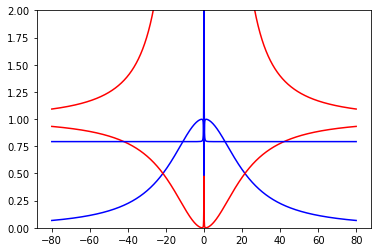

In [4]:
import matplotlib.pyplot as plt
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'r')
plt.plot(x, y3, 'b')
plt.plot(x, y4, 'r')
axes = plt.gca()
# axes.set_xlim([xmin,xmax])
axes.set_ylim([0,2])


In [260]:
import time
import numpy as np

from PhotonTransmission import PhotonTransmission
import matplotlib.pyplot as plt

current_time = time.time()
x, y1, y2 = PhotonTransmission(500)

finish_time = time.time()
print(finish_time-current_time)




13.798386096954346


In [31]:
import numpy as np
import jax
from math import comb
import numpy.matlib as mat
import scipy.linalg as la
from scipy.sparse import diags
import os
import time 
from genJ import genJ
import torch
# import matplotlib as 

def PhotonTransmission(num):
    os.environ["TF_CPP_MIN_LOG_LEVEL"] = "0"
    Hefft = 0

    g3fig = 0
    g3time = 0

    mu = 0
    sigma = 0

    tnum = 2
    t_end = 20

    #plotting parameters
    s = 0.2
    lim1 = -80
    lim2 = 80
    wnum = 5000

    minval = 6.66
    # time = 0

    n = [num]

    k = 43      # cavity linewidth (4.3 - Q~100,000, 43 - Q~10,000) 
    k1 = k/2
    k2 = k/2
    go = 0.32  #rabi frequency
    g = 0.043   # emitter linewidth
    Gc = 0      # additional loss channel
    wc = 0      # cavity detuning
    we = 0      # emitter detuning
    J = 0       # dipole-dipole coupling
    w = np.linspace(lim1, lim2, num=wnum)

    for N in n:
        jvec = J*torch.ones(int(N*(N-1)/2))

        Go = go*torch.ones(N)
        G = g*torch.ones(N)
        K = k*torch.ones(N)
        We = we*torch.ones(N)
        

        # values used to dimension the higher excitation hamiltonians
        nck0 = comb(N, 0)
        nck1 = comb(N, 1)

        try:
            nck2 = comb(N,2)
        except:
            nck2 = 0

        try:
            nck3 = comb(N,3)
        except:
            nck3 = 0

        # creation/annihilation operators
        gnd = 1
        a1 = torch.cat((torch.tensor([1]),torch.zeros(N, dtype=torch.cfloat)))
        # a2 = np.hstack((np.eye(N+1), mat.repmat(np.zeros((N+1, 1)), 1, nck2)))
        # a2[1] = a2[1]*np.sqrt(2)

        # a3 = np.zeros((nck0+nck1+nck2,nck0+nck1+nck2+nck3))
        # a3[0,0] = np.sqrt(3)
        # a3[1:(nck1+nck0),1:(nck1+nck0)] = np.eye(nck1)*(np.sqrt(2))
        # a3[nck0+nck1:nck0+nck1+nck2,nck0+nck1:nck0+nck1+nck2] = np.eye(nck2)

        ## Zeroth excitation subspace
        Heff0=0

        ## First Excitation Subspace
        Heff1=torch.zeros(N+1,N+1, dtype=torch.cfloat)
        # cavity loss
        Heff1[0,0]= wc - 1j*k/2 #+1iw comes from the diagonal contribution later
        # jax.ops.index_update(Heff1, jax.ops.index[0,0], wc - 1j*k/2)

        if N > 0:
            # atomic coupling
            print(Go.size())
            Heff1[0,1:N+1] = Go
            # jax.ops.index_update(Heff1, jax.ops.index[0,1:N+2], Go)
            Heff1[1:N+1,0] = Go
            # jax.ops.index_update(Heff1, jax.ops.index[1:N+2,0], Go)

            # spontaneous emission
            Heff1[1:N+1,1:N+1] += (np.diag(We)-1j*np.diag(G)/2)
            # jax.ops.index_add(Heff1, jax.ops.index[1:N+2,1:N+2], (np.diag(We)-1j*np.diag(G)/2))

        J=genJ(jvec)
        Heff1[1:nck0+nck1+1,1:nck0+nck1+1] += J
        # jax.ops.index_add(Heff1, jax.ops.index[1:nck0+nck1+1,1:nck0+nck1+1], J)

        # unsorted phi1
        # print(Heff1)
        lambda1, phi1 = la.eig(Heff1)
        lambda1 = torch.from_numpy(lambda1)
        phi1 = torch.from_numpy(phi1)
        # print(phi1)
        phi1v = la.inv(phi1)
        phi1v = torch.from_numpy(phi1v)
        # norm=la.norm(phi1, axis=0)
        # print(norm)

        w_inc = (lim2-lim1)/wnum
        t_inc = t_end/tnum
        t = torch.zeros(wnum, dtype=torch.cfloat)
        for i in range(0,wnum):
            w_val = lim1+(i+1)*w_inc
            D1 = ((lambda1-w_val)**-1)*torch.eye(N+1)
            # print(D1)
            # Transmission
            # current_time = time.time()

            inter3 = torch.matmul(a1,phi1)
            # time3 = time.time()
            # print("time3:", time3-current_time)

            inter2 = torch.matmul(inter3,D1)
            # time2 = time.time()
            # print("time2:", time2-time3)

            inter1 = torch.matmul(inter2,phi1v)
            # time1 = time.time()
            # print("time1:", time1-time2)

            inter0 = torch.matmul(inter1,np.transpose(a1))
            # time0 = time.time()
            # print("time0:", time0-time1)
            t[i] = 1j*np.transpose(gnd)*inter0*gnd
            # jax.ops.index_update(t, jax.ops.index[i], 1j*np.transpose(gnd)*inter0*gnd)

        T=k1*k2*t*np.conj(t)

        tk=np.sqrt(k1*k2)*t
        T_2port=(tk+1)*np.conj(tk+1)

        return w, T, T_2port


In [32]:
import time
current_time = time.time()

x, y1, y2 = PhotonTransmission(10)
finish_time = time.time()
print(finish_time-current_time)


torch.Size([10])
0.8010663986206055


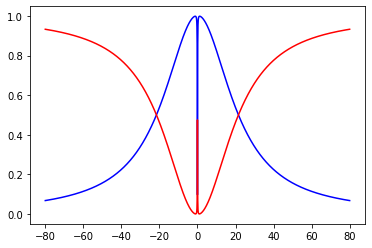

In [33]:
import matplotlib.pyplot as plt
plt.plot(np.transpose(x), y1, 'b')
plt.plot(x, y2, 'r')

In [2]:
from genJ import genJ
import numpy as np

J = genJ(0.2*np.ones(45))
print(J)

[[0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.  0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.  0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.  0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.  0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.  0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.  0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.  0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0. ]]


In [1]:
from genJvec import genJvec
import numpy as np

jVec = genJvec(5)
print(jVec)

[12, 13, 14, 15, 23, 24, 25, 34, 35, 45]


In [3]:
from genGO2_vec import genGO2
import numpy as np

GO2 = genGO2(np.array([5,5,5,5,5,5]))
print(GO2)


5
[[5. 5. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 5. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 5. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 5. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 5. 5. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 5. 0. 5. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 5. 0. 0. 5. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 5. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]
[[5. 5. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 5. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 5. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0.]
 [5. 0. 0. 0. 5. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0.]
 [0. 5. 5. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
 [0. 5. 0. 5. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 5. 0. 0. 5. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0.]
 [0. 0. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0.]
 [0. 0. 5. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0.]
 [0. 0. 0. 5. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]]
4
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.

In [2]:
from genGO_vec import genGO
import jax.numpy as np

# print(np.zeros((3,0)))

GO = genGO(np.array([0.3200,0.3200,0.3200,0.3200,0.3200,0.3200,0.3200,0.3200,0.3200,0.3200]))
print(GO)

[[0.32 0.32 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.32 0.   0.32 0.   0.   0.   0.   0.   0.   0.  ]
 [0.32 0.   0.   0.32 0.   0.   0.   0.   0.   0.  ]
 [0.32 0.   0.   0.   0.32 0.   0.   0.   0.   0.  ]
 [0.32 0.   0.   0.   0.   0.32 0.   0.   0.   0.  ]
 [0.32 0.   0.   0.   0.   0.   0.32 0.   0.   0.  ]
 [0.32 0.   0.   0.   0.   0.   0.   0.32 0.   0.  ]
 [0.32 0.   0.   0.   0.   0.   0.   0.   0.32 0.  ]
 [0.32 0.   0.   0.   0.   0.   0.   0.   0.   0.32]
 [0.   0.32 0.32 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.32 0.   0.32 0.   0.   0.   0.   0.   0.  ]
 [0.   0.32 0.   0.   0.32 0.   0.   0.   0.   0.  ]
 [0.   0.32 0.   0.   0.   0.32 0.   0.   0.   0.  ]
 [0.   0.32 0.   0.   0.   0.   0.32 0.   0.   0.  ]
 [0.   0.32 0.   0.   0.   0.   0.   0.32 0.   0.  ]
 [0.   0.32 0.   0.   0.   0.   0.   0.   0.32 0.  ]
 [0.   0.32 0.   0.   0.   0.   0.   0.   0.   0.32]
 [0.   0.   0.32 0.32 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.32 0.   0.32 0.   0.   0.   0.  